# Part 2 with Leapfrog 


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 301    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step we will come back to this 
t_final = 20.0 

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt) #how many iteration


# Define the initial condition
u_initial=np.where((x<6) & (x>4),1,0)


# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 301
dx= 0.03333333333333333
dt= 0.016666666666666666
Number of iterations= 1200.0


In [49]:

##create directory where to save images
print(os.getcwd())

os.makedirs('./images4', exist_ok=True)

#os.listdir('./')

/Users/sofiadossena/Desktop/Numerical Relativity


In [50]:
# Initilize time and iteration counter
t = 0.0
i = 0

Analitics=1 

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images4/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final: 
    if t==0:
        if Analitics==0:
            u_next = 0.5*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
        else :
            u_next = u_initial=np.where((x-a*dt<6) & (x+a*dt>4),1,0)
    else:    
        u_next = u_previous- a*dt/(dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
      
    
    # Update the solution
    u_previous= u_current.copy()
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images4/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


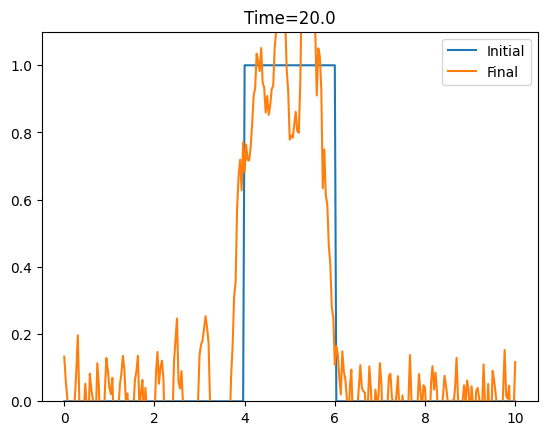

In [51]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [52]:
# set the directory where your images are stored
directory = "./images4/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)


['fig_00500.png', 'fig_01150.png', 'fig_00070.png', 'fig_01420.png', 'fig_00110.png', 'fig_01540.png', 'fig_00460.png', 'fig_01030.png', 'fig_01780.png', 'fig_01970.png', 'fig_00850.png', 'fig_00930.png', 'fig_01390.png', 'fig_01810.png', 'fig_01190.png', 'fig_01580.png', 'fig_01740.png', 'fig_00310.png', 'fig_00890.png', 'fig_01230.png', 'fig_00660.png', 'fig_01350.png', 'fig_00700.png', 'fig_01620.png', 'fig_00270.png', 'fig_01630.png', 'fig_00260.png', 'fig_01340.png', 'fig_00710.png', 'fig_00880.png', 'fig_01220.png', 'fig_00670.png', 'fig_01750.png', 'fig_00300.png', 'fig_01590.png', 'fig_01180.png', 'fig_01800.png', 'fig_00920.png', 'fig_01380.png', 'fig_00840.png', 'fig_01790.png', 'fig_01960.png', 'fig_00470.png', 'fig_01020.png', 'fig_00100.png', 'fig_01550.png', 'fig_00060.png', 'fig_01430.png', 'fig_00510.png', 'fig_01140.png', 'fig_01480.png', 'fig_01090.png', 'fig_01720.png', 'fig_00370.png', 'fig_01250.png', 'fig_00600.png', 'fig_01330.png', 'fig_00990.png', 'fig_00760.pn

In [53]:
import imageio.v2 as imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images4/'+file)
        writer.append_data(image)
        
files=[]


In [54]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie.mp4" type="video/mp4">
</video></div>""")


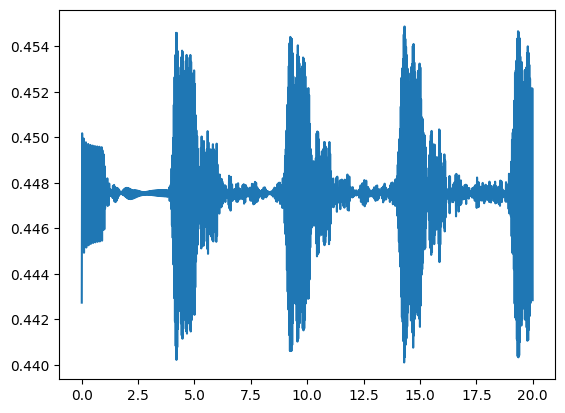

In [55]:
plt.plot(time,l2norm)
plt.show()

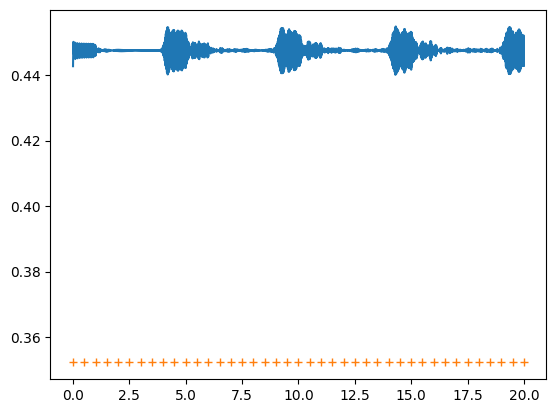

In [56]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_LEAPFROG.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()

#CHANHE THE LENUMBER OF POINT FOR EXAMPLE 